In [ ]:
#! pip install xlrd

import pandas as pd

df_numeric_data = pd.read_excel('Rad Onc Medical Physics Well-being Survey_June 3, 2022_13.16.xlsx', sheet_name='data_modified')

#print(df_numeric_data)
df_numeric_data.columns

In [ ]:
column_to_drop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q1']

df_numeric_data = df_numeric_data.drop(columns=column_to_drop)


In [ ]:
df_numeric_data = df_numeric_data.replace('Not at all','1')
df_numeric_data = df_numeric_data.replace('Low','2')
df_numeric_data = df_numeric_data.replace('Moderate','3')
df_numeric_data = df_numeric_data.replace('High','4')
df_numeric_data = df_numeric_data.replace('Extremely High','5')

df_numeric_data = df_numeric_data.replace('Not an issue','1')
df_numeric_data = df_numeric_data.replace('Low Priority','2')
df_numeric_data = df_numeric_data.replace('Medium Priority','3')
df_numeric_data = df_numeric_data.replace('High Priority','4')

df_numeric_data = df_numeric_data.replace('Not true at all','1')
df_numeric_data = df_numeric_data.replace('Rarely true','2')
df_numeric_data = df_numeric_data.replace('Sometimes true','3')
df_numeric_data = df_numeric_data.replace('Often true','4')
df_numeric_data = df_numeric_data.replace('Always true','5')

df_numeric_data = df_numeric_data.replace('A few times a year or less','1')
df_numeric_data = df_numeric_data.replace('Once a month or less','2')
df_numeric_data = df_numeric_data.replace('A few times a month','3')
df_numeric_data = df_numeric_data.replace('Once a week','4')
df_numeric_data = df_numeric_data.replace('A few times a week','5')
df_numeric_data = df_numeric_data.replace('Everyday','6')

In [ ]:
df_numeric_data

In [ ]:
column_to_drop = ['Q6', 'Q7', 'Q10', 'Q11', 'Q11_6_TEXT', 'Q12', 'Q12_7_TEXT', 'Q13',
       'Q13_6_TEXT']

df_numeric_data_2 = df_numeric_data.drop(columns=column_to_drop)

In [ ]:
print(df_numeric_data_2.columns.tolist())

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df_numeric_data_2.columns.tolist())

In [ ]:
# df_numeric_data.to_excel('numeric_data.xlsx', sheet_name='numeric_data')
#Q19
selected_columns = df_numeric_data_2[['Q19#1_1', 'Q19#1_2', 'Q19#1_3', 'Q19#1_4', 'Q19#1_5', 'Q19#1_6', 'Q19#1_7', 'Q19#1_8', 'Q19#1_9', 'Q19#1_10', 'Q19#1_11', 'Q19#1_12', 'Q19#1_13', 'Q19#1_14', 'Q19#1_15', 'Q19#1_16', 'Q19#1_17', 'Q19#1_18', 'Q19#1_19', 'Q19#1_20']]
df_numeric_data_3 = selected_columns.copy()

In [ ]:
#convert dataTpye from string to int
df_numeric_data_3 = df_numeric_data_3.astype('float')
df_numeric_data_3 = df_numeric_data_3.astype('Int64')

In [ ]:
#count mean
Q19_mean = df_numeric_data_3.mean(skipna=True) #.sort_values(ascending=True)
workplace_stressors = Q19_mean.to_frame(name="mean")
workplace_stressors

In [ ]:
#count range
Q19_range = df_numeric_data_3.max(skipna=True) - df_numeric_data_3.min(skipna=True) 
workplace_stressors['range'] = Q19_range
workplace_stressors


In [ ]:
#count standard_deviation
Q19_std = df_numeric_data_3.std(skipna=True) 
workplace_stressors['standard_deviation'] = Q19_std
workplace_stressors

In [ ]:
#count variance
Q19_var = df_numeric_data_3.var(skipna=True) 
workplace_stressors['variance'] = Q19_var
workplace_stressors


In [ ]:
workplace_stressors

In [366]:
#read Q19 workplace stressors
df_Q19_question = pd.read_excel('Rad Onc Medical Physics Well-being Survey_June 3, 2022_13.16.xlsx', sheet_name='Q19#1')
df_Q19_question

,question_id,question
0,Q19#1_1,Excessive workload
1,Q19#1_2,Unmanageable work schedules
2,Q19#1_3,Time Pressure
3,Q19#1_4,Inadequate staffing
4,Q19#1_5,Inefficient Workflows
5,Q19#1_6,Interruptions & Distractions
6,Q19#1_7,Inadequate Technology Implementation
7,Q19#1_8,Moral Distress
8,Q19#1_9,Patient Factors
9,Q19#1_10,Lack of recognition for Quality Improvement ac...


In [ ]:
#join question
workplace_stressors_analysis = pd.merge(workplace_stressors, df_Q19_question,  left_index=True, right_on='question_id')

#reorder columns
workplace_stressors_analysis = workplace_stressors_analysis[['question_id', 'question', 'mean', 'range', 'standard_deviation', 'variance']]
workplace_stressors_analysis

In [ ]:
#export to excel
# workplace_stressors_analysis.to_excel('workplace_stressors_analysis.xlsx', sheet_name='workplace_stressors_analysis')

In [365]:
#select top 7 stressors
workplace_stressors_top_7 = workplace_stressors_analysis.nlargest(7, ['mean'])
workplace_stressors_top_7

,question_id,question,mean,range,standard_deviation,variance
3,Q19#1_4,Inadequate staffing,3.125,4,1.246423,1.553571
0,Q19#1_1,Excessive workload,2.875,3,1.125992,1.267857
2,Q19#1_3,Time Pressure,2.625,4,1.187735,1.410714
4,Q19#1_5,Inefficient Workflows,2.500,3,1.069045,1.142857
10,Q19#1_11,Lack of dedicated time for Professional Develo...,2.500,3,0.925820,0.857143
12,Q19#1_13,Lack of support for Research and Teaching,2.500,3,1.195229,1.428571
1,Q19#1_2,Unmanageable work schedules,2.375,3,1.187735,1.410714


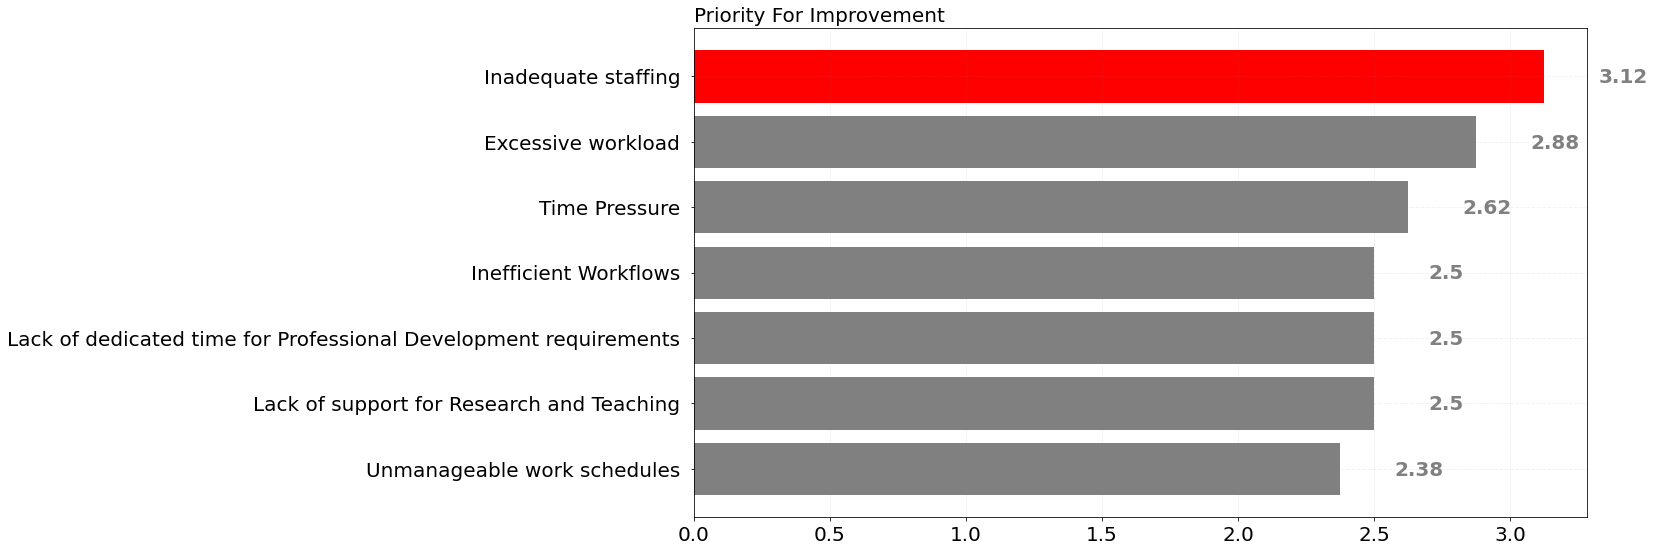

In [363]:
#visualized to bar chart
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

plt.rcParams.update({'font.size':20})


data_normalized = [x / max(workplace_stressors_top_7['mean']) for x in workplace_stressors_top_7['mean']]


my_cmap = plt.cm.get_cmap('YlGnBu')
colors = my_cmap(data_normalized)


fig, ax = plt.subplots(figsize =(16, 9))

Question = workplace_stressors_top_7['question']
Mean = workplace_stressors_top_7['mean']

max_val = workplace_stressors_top_7['mean'].max()

col = []
for val in Mean:
    if val == max_val:
        col.append('red')
    else:
        col.append('gray')

ax.barh(Question, Mean, color = col)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Priority For Improvement',
             loc ='left',fontsize = 20, )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 20,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

 
# Show Plot
plt.show()

In [ ]:
#Q20 priority for improvement
selected_columns_2 = df_numeric_data_2[['Q20#1_1', 'Q20#1_2', 'Q20#1_3', 'Q20#1_4', 'Q20#1_5', 'Q20#1_6', 'Q20#1_7', 'Q20#1_8', 'Q20#1_9', 'Q20#1_10', 'Q20#1_11', 'Q20#1_12', 'Q20#1_13', 'Q20#1_14', 'Q20#1_15', 'Q20#1_16', 'Q20#1_17', 'Q20#1_18', 'Q20#1_19', 'Q20#1_20', 'Q20#1_21',]]
df_numeric_data_4 = selected_columns_2.copy()
df_numeric_data_4

In [ ]:
#convert dataTpye from string to int
df_numeric_data_4 = df_numeric_data_4.astype('float')
df_numeric_data_4 = df_numeric_data_4.astype('Int64')
df_numeric_data_4

In [ ]:
#count mean
Q20_mean = df_numeric_data_4.mean(skipna=True) #.sort_values(ascending=True)
priority_for_improvement = Q20_mean.to_frame(name="mean")
priority_for_improvement

In [ ]:
#count range
Q20_range = df_numeric_data_4.max(skipna=True) - df_numeric_data_4.min(skipna=True) 
priority_for_improvement['range'] = Q20_range
priority_for_improvement



In [ ]:
#count standard_deviation
Q20_std = df_numeric_data_4.std(skipna=True) 
priority_for_improvement['standard_deviation'] = Q20_std
priority_for_improvement

In [ ]:
#count variance
Q20_var = df_numeric_data_4.var(skipna=True) 
priority_for_improvement['variance'] = Q20_var
priority_for_improvement

In [ ]:
#read Q20 priority_for_improvement
Qdf_20_question = pd.read_excel('Rad Onc Medical Physics Well-being Survey_June 3, 2022_13.16.xlsx', sheet_name='Q20#1')
Qdf_20_question

In [ ]:
#join question
priority_for_improvement_analysis = pd.merge(priority_for_improvement, df_Q20_question,  left_index=True, right_on='question_id')

#reorder columns
priority_for_improvement_analysis = priority_for_improvement_analysis[['question_id', 'question', 'mean', 'range', 'standard_deviation', 'variance']]
priority_for_improvement_analysis

In [ ]:
#export to excel
#priority_for_improvement_analysis.to_excel('priority_analysis.xlsx', sheet_name='priority_analysis')

In [367]:
#select top 7 improvement priority
improvement_priority_top_4 = priority_for_improvement_analysis.nlargest(4, ['mean'])
improvement_priority_top_4

,question_id,question,mean,range,standard_deviation,variance
3,Q20#1_4,Inadequate staffing,3.500000,1,0.547723,0.300000
0,Q20#1_1,Excessive workload,3.166667,1,0.408248,0.166667
1,Q20#1_2,Unmanageable work schedules,2.857143,2,0.690066,0.476190
20,Q20#1_21,Work-life Integration,2.833333,2,0.752773,0.566667


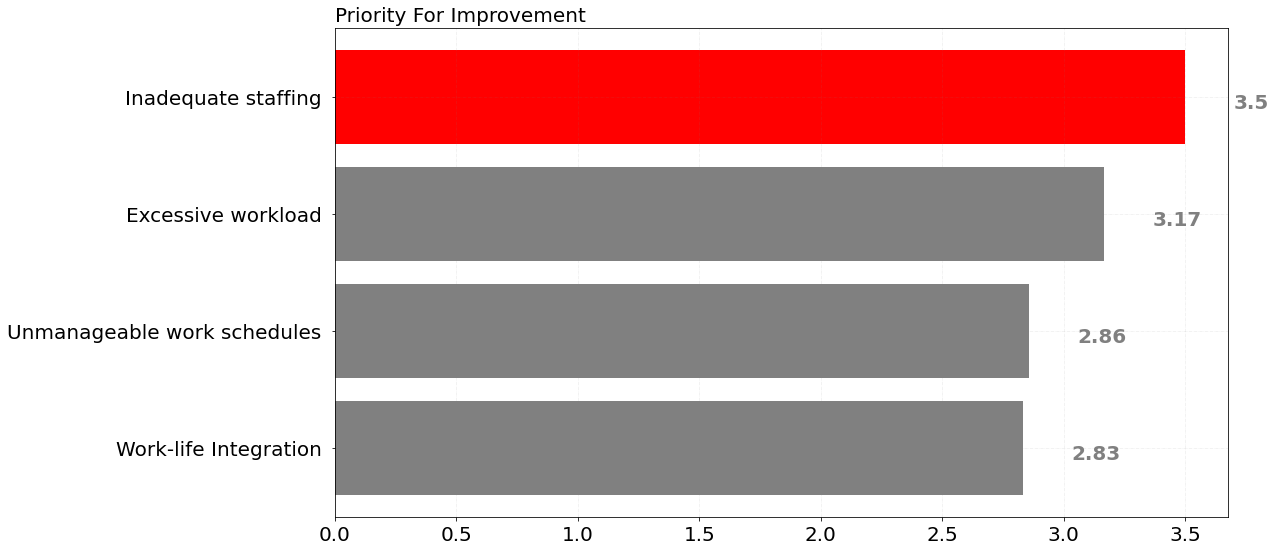

In [368]:
#visualized to bar chart
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

plt.rcParams.update({'font.size':20})


data_normalized = [x / max(improvement_priority_top_4['mean']) for x in improvement_priority_top_7['mean']]


my_cmap = plt.cm.get_cmap('YlGnBu')
colors = my_cmap(data_normalized)


fig, ax = plt.subplots(figsize =(16, 9))

Question = improvement_priority_top_4['question']
Mean = improvement_priority_top_4['mean']

max_val = improvement_priority_top_4['mean'].max()

col = []
for val in Mean:
    if val == max_val:
        col.append('red')
    else:
        col.append('gray')

ax.barh(Question, Mean, color = col)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Priority For Improvement',
             loc ='left',fontsize = 20, )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 20,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

 
# Show Plot
plt.show()

In [ ]:
data_normalized